In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#mnist 데이터 불러오기
(x_train, _), (x_test,_) = mnist.load_data()
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#생성자 모델 만들기
autoencoder = Sequential()

#인코딩 부분 (차원을 축소하는 부분)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
#입력을 줄이기 위한 방법 : MaxPooling 사용
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

#디코딩 부분 (차원을 늘리는 부분)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu'))
#padding 과정 없음 > 크기 축소, kernel_size 3*3 > 차원 축소
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

#전체 구조 확인
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)          

In [7]:
#컴파일 및 학습

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

#학습된 결과 출력
random_test = np.random.randint(x_test.shape[0], size=5)

#테스트 할 이미지 랜덤 호출
ae_imgs=autoencoder.predict(x_test) #만든 오토인코더 모델에 넣음


Epoch 1/50
469/469 [==============================] - 18s 11ms/step - loss: 0.2032 - val_loss: 0.1391
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1260 - val_loss: 0.1154
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1124 - val_loss: 0.1077
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1070 - val_loss: 0.1043
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1038 - val_loss: 0.1013
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1016 - val_loss: 0.0993
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0998 - val_loss: 0.0980
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0984 - val_loss: 0.0967
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0972 - val_loss: 0.0954
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0961 - val_loss: 0.0

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

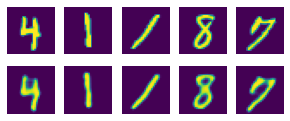

In [20]:
#데이터 시각화

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    #랜덤하게 추출한 이미지를 차례로 나열
    ax=plt.subplot(2,7,i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    #테스트할 이미지를 먼저 그대로 보여줌
    ax.axis('off')
    ax=plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    #오토인코딩 결과를 다음 열에 출력함
    ax.axis('off')

plt.show()